In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as ml
sns.set(style="ticks", color_codes=True)
# to show the figures in the jupyter notebook itself
%matplotlib inline 

train = pd.read_csv('train_bikes.csv', parse_dates=['datetime']) # loading the training dat

print(train)

                 datetime  season  holiday  workingday  weather   temp  \
0     2011-01-01 00:00:00       1        0           0        1   9.84   
1     2011-01-01 01:00:00       1        0           0        1   9.02   
2     2011-01-01 02:00:00       1        0           0        1   9.02   
3     2011-01-01 03:00:00       1        0           0        1   9.84   
4     2011-01-01 04:00:00       1        0           0        1   9.84   
5     2011-01-01 05:00:00       1        0           0        2   9.84   
6     2011-01-01 06:00:00       1        0           0        1   9.02   
7     2011-01-01 07:00:00       1        0           0        1   8.20   
8     2011-01-01 08:00:00       1        0           0        1   9.84   
9     2011-01-01 09:00:00       1        0           0        1  13.12   
10    2011-01-01 10:00:00       1        0           0        1  15.58   
11    2011-01-01 11:00:00       1        0           0        1  14.76   
12    2011-01-01 12:00:00       1     

In [4]:
train.head(8)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3


In [5]:
iris = sns.load_dataset("train")

HTTPError: HTTP Error 404: Not Found

In [ ]:
g = sns.pairplot(iris)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


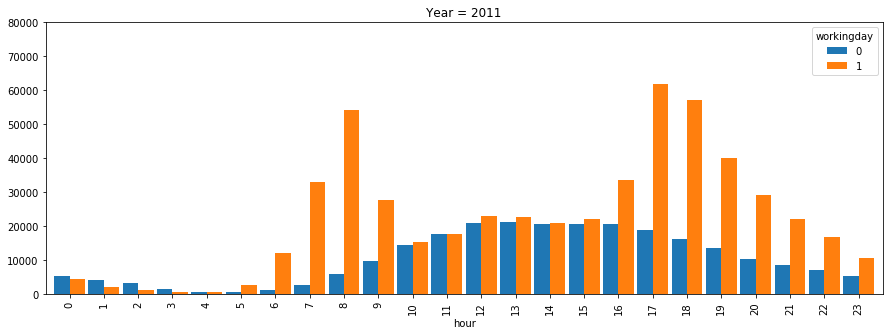

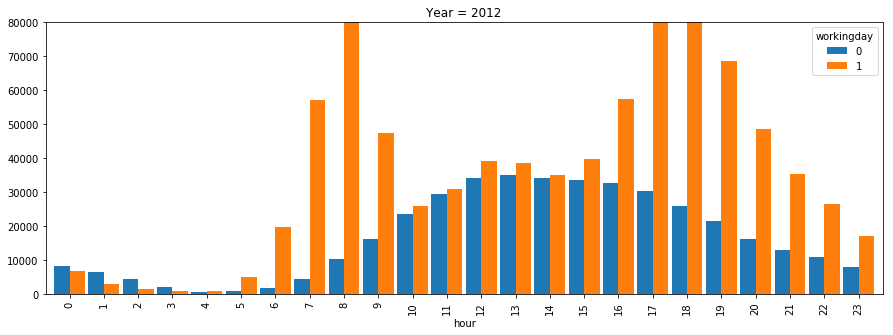

In [5]:
# method for creating the count plot based on hour for a given year 
def plot_by_hour(data, year=None, agg='sum'):
    dd = data
    if year: dd = dd[ dd.datetime.dt.year == year ]
    dd.loc[:, ('hour')] = dd.datetime.dt.hour # extracting the hour data if the year in the data is equal to the year passed as argument
    
    by_hour = dd.groupby(['hour', 'workingday'])['count'].agg(agg).unstack() # groupby hour and working day
    return by_hour.plot(kind='bar', ylim=(0, 80000), figsize=(15,5), width=0.9, title="Year = {0}".format(year)) # returning the figure grouped by hour
plot_by_hour(train, year=2011) # plotting the count plot based on hour for 2011 
plot_by_hour(train, year=2012) # plotting the count plot based on hour for 2012

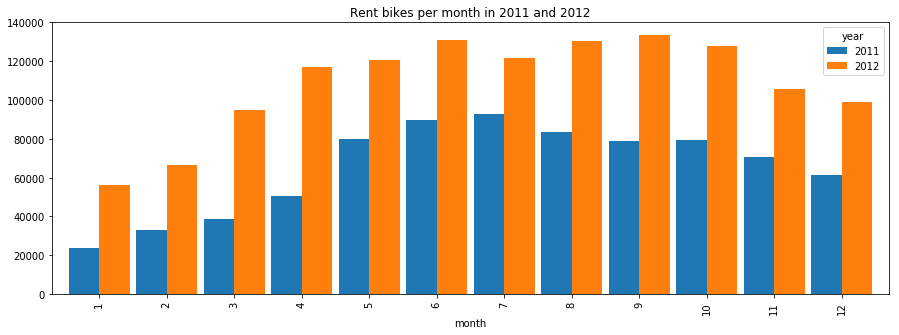

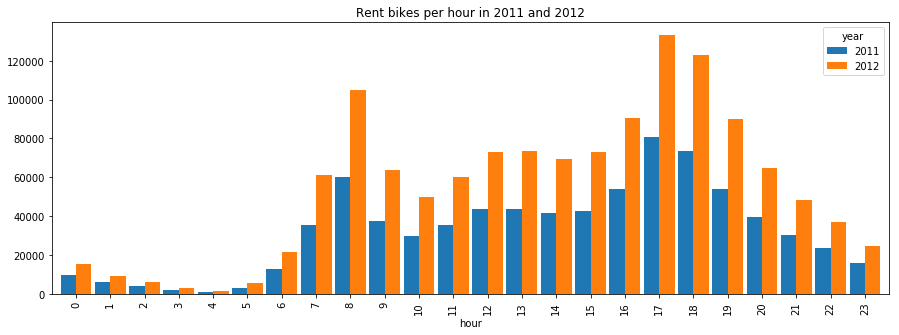

In [6]:
# method for creating the count plot based on year 
def plot_by_year(agg_attr, title):
    # extracting the required fields
    dd = train.copy()
    dd['year'] = train.datetime.dt.year # extratcing the year
    dd['month'] = train.datetime.dt.month # extratcing the month
    dd['hour'] = train.datetime.dt.hour # extratcing the hour
    
    by_year = dd.groupby([agg_attr, 'year'])['count'].agg('sum').unstack() # groupby year
    return by_year.plot(kind='bar', figsize=(15,5), width=0.9, title=title) # returning the figure grouped by year


plot_by_year('month', "Rent bikes per month in 2011 and 2012") # plotting monthly bike rentals based on year
plot_by_year('hour', "Rent bikes per hour in 2011 and 2012") # plotting hourls bike rentals based  on year

In [7]:
X = train['registered']
y = train['count']

In [8]:
print(X)
print(y)

0         13
1         32
2         27
3         10
4          1
5          1
6          0
7          2
8          7
9          6
10        24
11        30
12        55
13        47
14        71
15        70
16        52
17        52
18        26
19        31
20        25
21        31
22        17
23        24
24        13
25        16
26         8
27         4
28         1
29         2
        ... 
10856    512
10857    334
10858    264
10859    159
10860    127
10861     80
10862     35
10863     14
10864      2
10865      5
10866      6
10867     29
10868    109
10869    360
10870    665
10871    309
10872    147
10873    169
10874    203
10875    183
10876    185
10877    209
10878    297
10879    536
10880    546
10881    329
10882    231
10883    164
10884    117
10885     84
Name: registered, Length: 10886, dtype: int64
0         16
1         40
2         32
3         13
4          1
5          1
6          2
7          3
8          8
9         14
10        36
11        56
12   

In [9]:
#Assigning data for test and training,if test is 25% then by defalut traing is 75
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=.25,random_state=20)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [10]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 30, random_state = 0)
regressor.fit(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


ValueError: Expected 2D array, got 1D array instead:
array=[ 13.  32.  27. ... 164. 117.  84.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [2]:
pair(train)

NameError: name 'pair' is not defined

In [ ]:
y_pred = regressor.predict(1.7)
print(y_pred)